In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

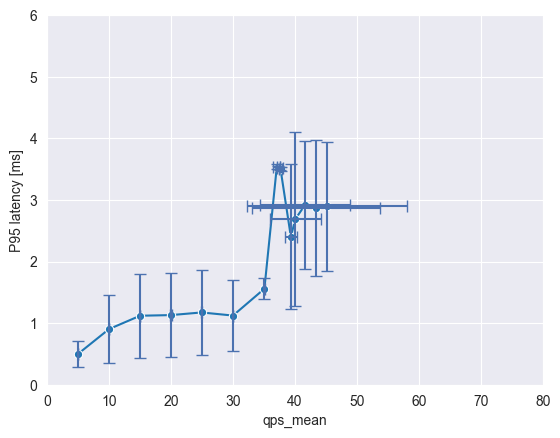

In [38]:
def process_benchmark(benchmark: str):
    df1 = pd.read_csv(f"./data/{benchmark}_run1_int.csv")
    df1["run"] = 1
    df2 = pd.read_csv(f"./data/{benchmark}_run2_int.csv")
    df2["run"] = 2
    df3 = pd.read_csv(f"./data/{benchmark}_run3_int.csv")
    df2["run"] = 3
    df = pd.concat([df1, df2, df3])
    data = df[['QPS', 'target', 'p95']].groupby("target")[['QPS', 'p95']].agg(qps_mean=("QPS", "mean"), p95_mean=('p95', "mean"), p95_err=('p95', "std"), qps_err=('QPS', "std")).reset_index()
    return data

def plot_benchmark(df):
    data = df.copy()
    data['p95_mean'] = data['p95_mean'] / 1000
    data['p95_err'] = data['p95_err'] / 1000
    data['qps_mean'] = data['qps_mean'] / 1000
    data['qps_err'] = data['qps_err'] / 1000
    sns.set_style("darkgrid")

    sns.lineplot(data, x='qps_mean', y='p95_mean', marker='o')
    plt.ylim(0, 6)
    plt.ylabel("P95 latency [ms]")
    plt.xlim(0, 80)
    plt.errorbar(x=data['qps_mean'], y=data['p95_mean'], yerr=data['p95_err'],xerr=data['qps_err'], fmt='none', color=(0.298, 0.447, 0.690), capsize=4)
    plt.show()

df = process_benchmark("cpu")
plot_benchmark(df)

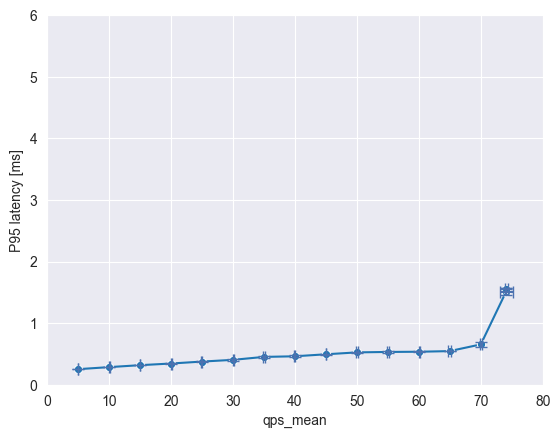

In [39]:
df = process_benchmark("bl")
plot_benchmark(df)

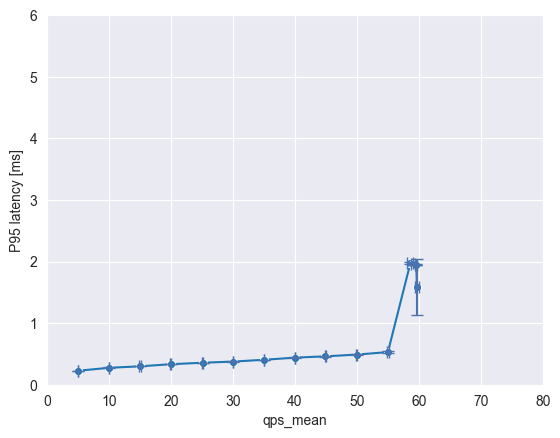

In [40]:
df = process_benchmark("l2")
plot_benchmark(df)

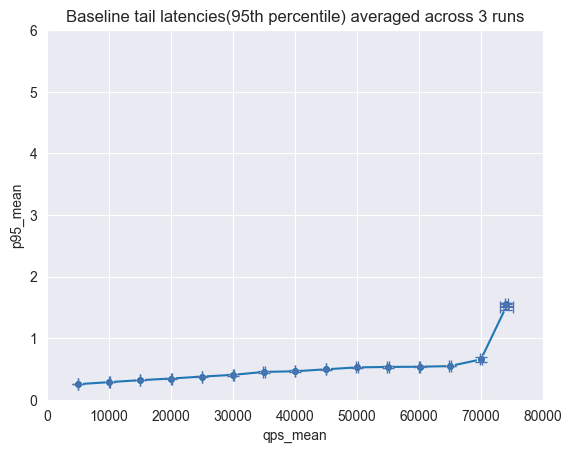

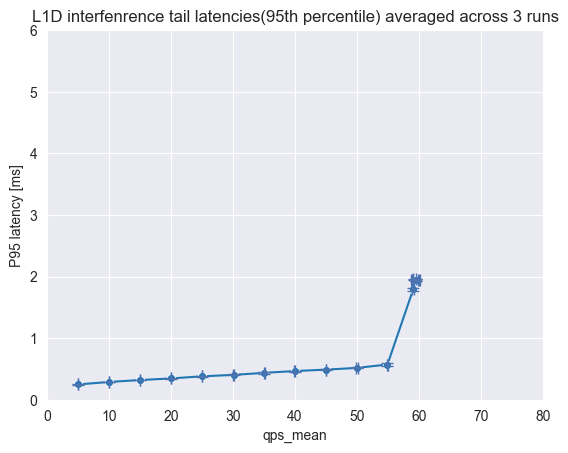